## Term Sheet Exploratory Data Analysis

> import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# bespoke module
from data import outlier_vars

> import datasets

In [2]:
path= '../../datasets/main_data/bank-additional-full.csv'
full_bank = pd.read_csv(path, sep=';', delimiter=None, )

In [3]:
full_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Data Wrangling

In [4]:
full_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

> Check for null values

In [5]:
full_bank.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

> No na values

> inspect the numerical values

In [6]:
num_cols = full_bank.select_dtypes(include='number')

In [7]:
num_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


> check for statistical properties

In [8]:
num_cols.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


> check for outliers

In [9]:
def outlier_vars(data, show_plot=False):
    
    """
    This functions checks for columns with outlers using the IQR method
    
    It accespts as argmuent a dataset. 
    show_plot can be set to True to output pairplots of outlier columns
    
    """
    
    outliers = [] 
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    num_data = data.select_dtypes(include='number')
    result = dict ((((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))==True).any())
    for k,v in result.items():
        if v == True: 
            outliers.append(k)
    if show_plot:
        pair_plot = sns.pairplot(data[outliers]);
        print(f'{result},\n\n Visualization of outlier columns')
        return pair_plot
    else:
        return data[outliers]


In [10]:
outliers = outlier_vars(num_cols)
outliers

,age,duration,campaign,pdays,previous,cons.conf.idx
0,56,261,1,999,0,-36.4
1,57,149,1,999,0,-36.4
2,37,226,1,999,0,-36.4
3,40,151,1,999,0,-36.4
4,56,307,1,999,0,-36.4
...,...,...,...,...,...,...
41183,73,334,1,999,0,-50.8
41184,46,383,1,999,0,-50.8
41185,56,189,2,999,0,-50.8
41186,44,442,1,999,0,-50.8


> plot the outlier columns

{'age': True, 'duration': True, 'campaign': True, 'pdays': True, 'previous': True, 'emp.var.rate': False, 'cons.price.idx': False, 'cons.conf.idx': True, 'euribor3m': False, 'nr.employed': False},

 Visualization of outlier columns


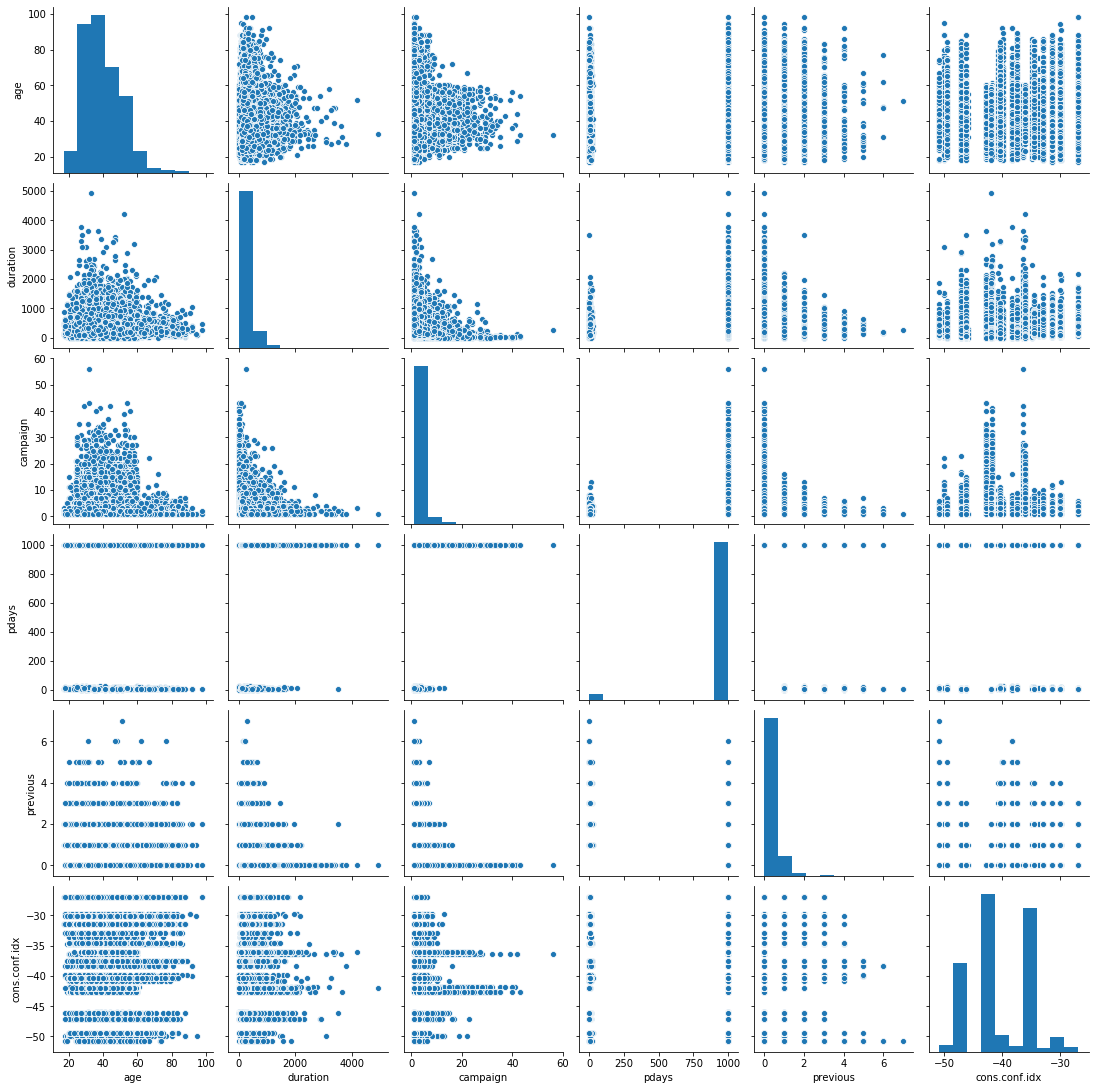

In [11]:
outlier_vars(data=num_cols, show_plot=True) 

> About 5 columns in the numerical columns have outliers  

Cleaning

Replace outlier values using median Replacement

In [12]:
outlier_cols = outliers.columns.values.tolist()
outlier_cols

['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']

In [18]:
def quant_floor_outlier(data, col_list):
    
    for col in col_list:
        
        Q1 = data.quantile(0.25)[0]
        Q3 = data.quantile(0.75)[0]
        median = data.quantile(0.50)[0]
        
        print(Q1, Q3, median)
        
        IQR = Q3 - Q1
        
        low = Q1 - 1.5 * IQR
        
        high = Q3 + 1.5 * IQR 
        
        
        data[col] = np.where(data[col] < low, median, data[col])
        
       # break
        
    return data

        
#         print(col)
#         q_10 = data[col].quantile(0.10)
#         print(q_10)
#         q_90 = data[col].quantile(0.90)
#         print(q_90)
        
#         data[col] =  data[col] = np.where(data[col] < q_10, q_10 , data[col])
#         data[col] =  data[col] = np.where(data[col] < q_90, q_90 , data[col])

#     return data
# r data[col] > high

In [19]:
no_outlier_data = quant_floor_outlier(full_bank, outlier_cols)

32.0 47.0 38.0
32.0 47.0 38.0
32.0 47.0 38.0
32.0 47.0 38.0
32.0 47.0 38.0
32.0 47.0 38.0


In [20]:
no_outlier_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,38.0,999.0,38.0,nonexistent,1.1,93.994,38.0,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,38.0,999.0,38.0,nonexistent,1.1,93.994,38.0,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,38.0,999.0,38.0,nonexistent,1.1,93.994,38.0,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,38.0,999.0,38.0,nonexistent,1.1,93.994,38.0,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,38.0,999.0,38.0,nonexistent,1.1,93.994,38.0,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,38.0,999.0,38.0,nonexistent,-1.1,94.767,38.0,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,38.0,999.0,38.0,nonexistent,-1.1,94.767,38.0,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,38.0,999.0,38.0,nonexistent,-1.1,94.767,38.0,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,38.0,999.0,38.0,nonexistent,-1.1,94.767,38.0,1.028,4963.6,yes


> confirm no more outlier values

In [21]:
outlier_vars(no_outlier_data)

,age,duration,campaign,pdays
0,56.0,261.0,38.0,999.0
1,57.0,149.0,38.0,999.0
2,37.0,226.0,38.0,999.0
3,40.0,151.0,38.0,999.0
4,56.0,307.0,38.0,999.0
...,...,...,...,...
41183,73.0,334.0,38.0,999.0
41184,46.0,383.0,38.0,999.0
41185,56.0,189.0,38.0,999.0
41186,44.0,442.0,38.0,999.0
